**PROBLEM STATEMENT**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

●	Perform EDA

●	Build various Models to Predict the price




# **Exploratory Data Analysis**


### importing all necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline

import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data set
import pandas as pd
df = pd.read_csv("/content/Cars.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Displaying the data of first five rows
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [ ]:
#checking the shape of the data
df.shape

(5961, 15)

In [ ]:
#Checking the basic stats
df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


In [ ]:
#showing total number of elements
df.size

89415

In [ ]:
#Checking the percentage of missing values in each column of dataframe
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [ ]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [ ]:
#checking the number of unique elements
df.nunique()

Name                  212
Location               11
Year                   22
Kilometers_Driven    3068
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               439
Engine                143
Power                 369
Colour                  3
Seats                   8
No. of Doors            3
New_Price             540
Price                1369
dtype: int64

In [ ]:
#Checking if there are any duplicate rows
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


# Data Visualisation


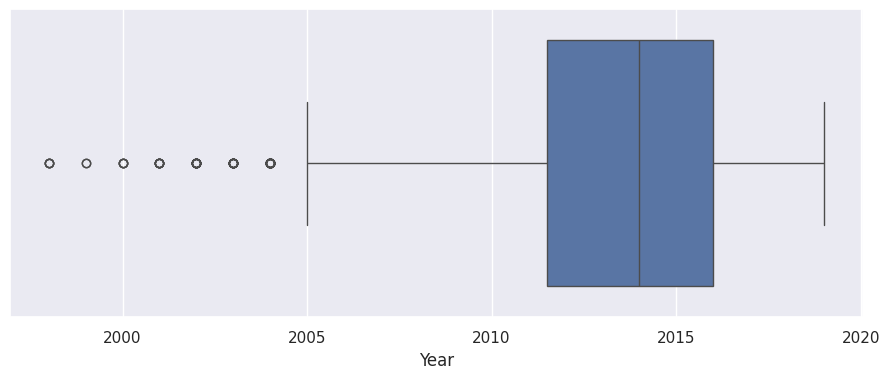

In [ ]:
sns.boxplot(x='Year',data=df)
plt.show()

In [ ]:
Q1 = df.Year.quantile(0.25)
Q3 = df.Year.quantile(0.75)
IQR = Q3-Q1
print(IQR)

4.5


In [ ]:
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

outliers = df[(df['Year'] < lower_bound) | (df['Year'] > upper_bound)]

print("Number of outliers:", len(outliers))

Number of outliers: 10


In [ ]:
from scipy import stats
#Calculate z_scores
z_scores = np.abs(stats.zscore(df['Year']))
# Define a threshold for z_scores
threshold = 3
# Filter the data frome to remove outliers
filtered_df = df[(z_scores < threshold)]


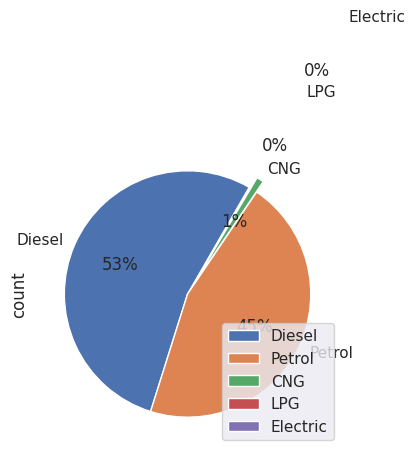

In [ ]:
df.head()
ft=df["Fuel_Type"]
#for Values in pie-chart
piedata=df['Fuel_Type'].value_counts()
#To give padding
explode = (0,0, 0.1,0.8,1.5)
#to place pie
piedata.plot(kind='pie',autopct='%1.0f%%',explode=explode,startangle=60)
#to show legends
plt.legend()
plt.show()

<Axes: xlabel='Year'>

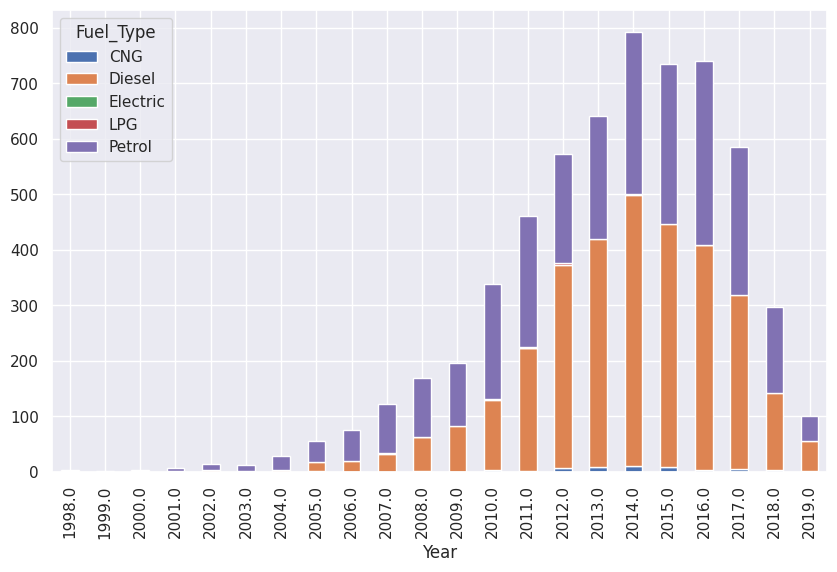

In [ ]:

#Defined info of chart
bardata = pd.crosstab(index=df['Year'],columns=df['Fuel_Type'])
#Displayed the chart
bardata.plot(kind='bar',stacked=True,figsize=(10, 6))


<Axes: >

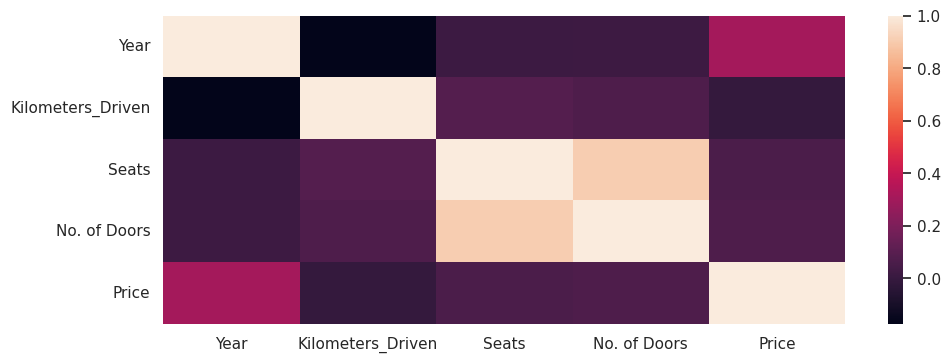

In [ ]:

#to specify data of heatmap
heatdata=df.select_dtypes(include='float64')
#to display map
sns.heatmap(heatdata.corr())

# Cleaning the Data

In [ ]:
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [ ]:
#Removing the null values
df=df[~df['Location'].isna()]
df=df[~df['Year'].isna()]
df=df[~df['Kilometers_Driven'].isna()]
df=df[~df['Transmission'].isna()]
df=df[~df['Owner_Type'].isna()]
df=df[~df['Mileage'].isna()]
df=df[~df['Engine'].isna()]
df=df[~df['Power'].isna()]
df=df[~df['Colour'].isna()]
df=df[~df['Seats'].isna()]
df=df[~df['New_Price'].isna()]
df=df[~df['No. of Doors'].isna()]

In [ ]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
New_Price            0
Price                0
dtype: int64

## Encoding the Categorical Data

In [ ]:
#encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding "Owner_Type" Column
df.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)

#encoding "Colour" Column
df.replace({'Colour':{'Black/Silver':0,'Others':1,'White':2}},inplace=True)

In [ ]:
df['Mileage']=df['Mileage'].str.split(' ').str.get(0)
df['Engine']=df['Engine'].str.split(' ').str.get(0)
df['Power']=df['Power'].str.split(' ').str.get(0)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
5,Honda WRV,Kochi,2018.0,15135.0,0,0,0,17.5,1199,88.7,2,5.0,4.0,10.57 Lakh,9.29
22,BMW 3,Mumbai,2014.0,48000.0,1,1,0,21.76,1995,190,1,5.0,4.0,60.88 Lakh,26.50
27,Maruti Vitara,Coimbatore,2018.0,64456.0,1,0,0,24.3,1248,88.5,2,5.0,4.0,11 Lakh,10.46
32,Maruti Wagon,Kochi,2011.0,15466.0,0,0,0,22.5,998,67.04,2,5.0,4.0,5.04 Lakh,3.36
36,Mercedes-Benz C-Class,Mumbai,2018.0,8682.0,1,1,0,0.0,1950,194,2,5.0,4.0,52.26 Lakh,39.50


In [ ]:
#oneHotEncoding
df_new =pd.get_dummies(df, columns =['Name','Location','Mileage','Engine','Power','New_Price'])

In [ ]:
df_new.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Name_Audi A3,...,New_Price_9.97 Lakh,New_Price_9.99 Lakh,New_Price_91.23 Lakh,New_Price_91.38 Lakh,New_Price_92.5 Lakh,New_Price_92.79 Lakh,New_Price_95.04 Lakh,New_Price_95.13 Lakh,New_Price_95.38 Lakh,New_Price_99.92 Lakh
5,2018.0,15135.0,0,0,0,2,5.0,4.0,9.29,False,...,False,False,False,False,False,False,False,False,False,False
22,2014.0,48000.0,1,1,0,1,5.0,4.0,26.50,False,...,False,False,False,False,False,False,False,False,False,False
27,2018.0,64456.0,1,0,0,2,5.0,4.0,10.46,False,...,False,False,False,False,False,False,False,False,False,False
32,2011.0,15466.0,0,0,0,2,5.0,4.0,3.36,False,...,False,False,False,False,False,False,False,False,False,False
36,2018.0,8682.0,1,1,0,2,5.0,4.0,39.50,False,...,False,False,False,False,False,False,False,False,False,False


## Splitting Data into training and testing

In [ ]:
X= df_new.drop('Price',axis=1)
y= df_new['Price']

In [ ]:
X

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Name_Audi A3,Name_Audi A4,...,New_Price_9.97 Lakh,New_Price_9.99 Lakh,New_Price_91.23 Lakh,New_Price_91.38 Lakh,New_Price_92.5 Lakh,New_Price_92.79 Lakh,New_Price_95.04 Lakh,New_Price_95.13 Lakh,New_Price_95.38 Lakh,New_Price_99.92 Lakh
5,2018.0,15135.0,0,0,0,2,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
22,2014.0,48000.0,1,1,0,1,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
27,2018.0,64456.0,1,0,0,2,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
32,2011.0,15466.0,0,0,0,2,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
36,2018.0,8682.0,1,1,0,2,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,2018.0,38394.0,0,0,0,1,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
5892,2018.0,32586.0,1,1,0,1,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
5896,2012.0,80000.0,1,0,0,0,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
5907,2017.0,36723.0,1,1,0,2,5.0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y

5        9.29
22      26.50
27      10.46
32       3.36
36      39.50
        ...  
5884     9.18
5892    37.30
5896     6.75
5907    32.57
5944     6.95
Name: Price, Length: 808, dtype: float64

In [ ]:
X= np.array(X)
y= np.array(y)

In [ ]:
print("Shape of X is:",X.shape)
print("Shape of y is:",y.shape)

Shape of X is: (808, 986)
Shape of y is: (808,)


In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,
                                               random_state=1)

# **Model Training**

## Random Forest Regression

In [ ]:
random_model= RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.7972654230284375

### **XGBBoost Regression**

In [ ]:
xgb_model =XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.8468721094740369